In [ ]:
# ruff: noqa

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import json

In [33]:
from pathlib import Path

In [74]:
img_folder = "report/images/"

In [ ]:
end = 25
f = open("multirun/2024-03-29/00-00-46/1/results/state/histories/history.json")
data = json.load(f)
ys = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]][:end]
plt.plot(ys, label="3CNN train lost")
val_loss = [x[1] for x in data["losses_distributed"]][:end]
test_loss = [x[1] for x in data["losses_centralized"]][1:][:end]
plt.plot(val_loss, "g", label="val loss")
plt.plot(test_loss, "m", label="test loss")

f = open("multirun/2024-03-29/00-00-46/0/results/state/histories/history.json")
data = json.load(f)
ys = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]][:end]
plt.plot(ys, "b--", label="2CNN")
val_loss = [x[1] for x in data["losses_distributed"]][:end]
test_loss = [x[1] for x in data["losses_centralized"]][1:][:end]
plt.plot(val_loss, "g--")
plt.plot(test_loss, "m--")

plt.legend()
plt.xlabel("Round")
plt.ylabel("Loss")
# plt.show()
plt.savefig(img_folder + "initial_training.pdf")

In [ ]:
f = open("multirun/2024-03-29/00-00-46/1/results/state/histories/history.json")
data = json.load(f)
ys = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]][:end]
plt.plot(ys, label="3CNN train lost")
val_loss = [x[1] for x in data["metrics_distributed"]["test_accuracy"]][:end]
test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:][:end]
plt.plot(val_loss, "g", label="val loss")
plt.plot(test_loss, "m", label="test loss")

f = open("multirun/2024-03-29/00-00-46/0/results/state/histories/history.json")
data = json.load(f)
ys = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]][:end]
plt.plot(ys, "b--", label="2CNN")
val_loss = [x[1] for x in data["metrics_distributed"]["test_accuracy"]][:end]
test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:][:end]
plt.plot(val_loss, "g--")
plt.plot(test_loss, "m--")

plt.legend()
plt.xlabel("Round")
plt.ylabel("Accuracy")
# plt.show()
plt.savefig(img_folder + "initial_training_acc.pdf")

In [50]:
f = open("multirun/2024-03-29/00-00-46/1/results/state/histories/history.json")
data = json.load(f)

In [51]:
list(data["metrics_distributed"].keys())

['test_accuracy']

In [52]:
data["metrics_distributed_fit"]["train_loss"][0]

[1, 0.3830795255170928]

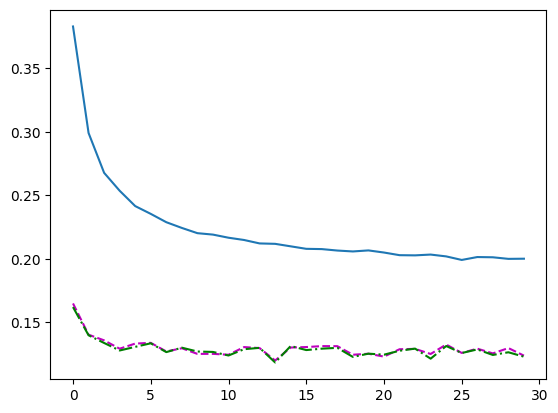

In [56]:
# xs = [x[0] for x in data['metrics_distributed_fit']['train_loss']]
ys = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]][:30]
plt.plot(ys)
val_loss = [x[1] for x in data["losses_distributed"]][:30]
test_loss = [x[1] for x in data["losses_centralized"]][1:][:30]
plt.plot(val_loss, "m--")
plt.plot(test_loss, "g-.")
plt.show()

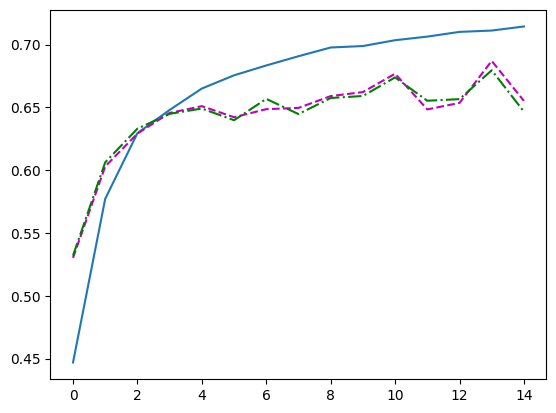

In [57]:
end = 15
ys = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]][:end]
plt.plot(ys)
val_loss = [x[1] for x in data["metrics_distributed"]["test_accuracy"]][:end]
test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:][:end]
plt.plot(val_loss, "m--")
plt.plot(test_loss, "g-.")
plt.show()

# Dataset testing

In [1]:
from torchvision import transforms
from torchvision.datasets import CIFAR10

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
])

In [5]:
trainset = CIFAR10(
    "./data/cifar10/data",
    train=True,
    download=True,
    transform=transform,
)

Files already downloaded and verified


In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [116]:
frogs = [x for x, y in trainset if y == 6]

In [119]:
np.mean(frogs)

-0.21782355

In [128]:
sorted_data = [[] for i in range(10)]
for x, y in trainset:
    sorted_data[y].append(x)
data_means = [np.mean(xs) for xs in sorted_data]

In [129]:
data_means

[0.33463785,
 -0.064270616,
 -0.01881467,
 -0.06924356,
 -0.13701655,
 -0.05070442,
 -0.21782355,
 -0.026683653,
 0.19539687,
 0.054342426]

In [131]:
data_std = [np.std(xs) for xs in sorted_data]
data_std

[1.0199289,
 1.0772631,
 0.9204569,
 1.0227998,
 0.85094655,
 0.9911887,
 0.89845693,
 0.9849891,
 1.001772,
 1.0893141]

## Data distribution

In [34]:
partition = Path("data/cifar10/partition") / "0.1"
dataset = torch.load(partition / "client_0" / "train.pt")

In [38]:
labels = [x[1] for x in dataset]

In [ ]:
plt.hist(labels, bins=10)

In [ ]:
num_clients = 100
num_classes = 10

top_partition_dir = Path("data/cifar10/partition")
for concentration in [0.1, 1.0, 1000.0]:

    fig, axs = plt.subplots(10, 10, sharex="all", sharey="all")
    for client in range(num_clients):
        partition = top_partition_dir / str(concentration) / f"client_{client}"
        dataset = torch.load(partition / "train.pt")
        labels = [x[1] for x in dataset]
        axs[client // 10][client % 10].hist(labels, bins=num_classes)
    fig.savefig(img_folder + "all_data_dist_" + str(concentration) + ".pdf")
    fig.show()

In [ ]:
top_partition_dir = Path("data/cifar10/partition")
for concentration in [0.1, 1.0, 1000.0]:

    fig, axs = plt.subplots(10, 10, sharex="all", sharey="all")
    for client in range(num_clients):
        partition = top_partition_dir / str(concentration) / f"client_{client}"
        dataset = torch.load(partition / "train.pt")
        labels = [x[1] for x in dataset]
        axs[client // 10][client % 10].hist(labels, bins=num_classes)
    fig.show()

In [45]:
dataset_dist = {}

top_partition_dir = Path("data/cifar10/partition")
for concentration in [0.1, 1.0, 1000.0]:
    dataset_dist[concentration] = []

    for client in range(num_clients):
        partition = top_partition_dir / str(concentration) / f"client_{client}"
        dataset = torch.load(partition / "train.pt")
        labels = [x[1] for x in dataset]
        dataset_dist[concentration].append(np.bincount(labels, minlength=num_classes))

In [ ]:
fig, axs = plt.subplots(3, 5, sharex="all", sharey="row")
for i, concentration in enumerate([0.1, 1.0, 1000.0]):
    samples = np.random.choice(num_clients, 5, False)
    for j, s in enumerate(samples):
        axs[i][j].bar(np.arange(num_classes), dataset_dist[concentration][s])
fig.suptitle("Distribution of labels in partitioned dataset")
fig.text(0.5, 0.04, "Labels", ha="center", va="center")
fig.text(0.06, 0.5, "Label frequency", ha="center", va="center", rotation="vertical")
fig.show()
fig.savefig(img_folder + "label_dist_partial.svg")

# Results Analysis

## Overall train performance

In [26]:
f = open("multirun/2024-03-30/04-57-51/0/results/state/histories/history.json")
data = json.load(f)

In [ ]:
test_loss = [x[1] for x in data["losses_centralized"]][1:]
val_loss = [x[1] for x in data["losses_distributed"]]
train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]]
plt.plot(train_loss, "b-", val_loss, "g--", test_loss, "c:")
plt.show()

In [ ]:
test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:]
val_loss = [x[1] for x in data["metrics_distributed"]["test_accuracy"]]
train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]]
plt.plot(train_loss, "b-", val_loss, "g--", test_loss, "c:")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, sharex="col", sharey="row", figsize=(15, 10))
for i in range(3):
    f = open(f"multirun/2024-03-30/17-42-59/{i}/results/state/histories/history.json")
    g = open(f"multirun/2024-03-31/00-51-26/{i}/results/state/histories/history.json")

    data = json.load(f)
    test_loss = [x[1] for x in data["losses_centralized"]][1:]
    # val_loss = [x[1] for x in data['losses_distributed']]
    train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]]
    axes[0][i].plot(train_loss, "b-", label="train (w/ IMA)")
    axes[0][i].plot(test_loss, "g-", label="test loss (w/ IMA)")

    test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:]
    # val_loss = [x[1] for x in data['metrics_distributed']['test_accuracy']]
    train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]]
    axes[1][i].plot(train_loss, "b-", test_loss, "g-")

    data = json.load(g)
    test_loss = [x[1] for x in data["losses_centralized"]][1:]
    train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_loss"]]
    axes[0][i].plot(train_loss, "b:", label="train (w/o IMA)")
    axes[0][i].plot(test_loss, "g:", label="test loss (w/o IMA)")

    test_loss = [x[1] for x in data["metrics_centralized"]["test_accuracy"]][1:]
    train_loss = [x[1] for x in data["metrics_distributed_fit"]["train_accuracy"]]
    axes[1][i].plot(train_loss, "b:", test_loss, "g:")

    axes[0][i].set_title("concentration=" + str(concentrations[i]))
axes[0][0].legend()
axes[0][0].set_ylabel("Loss")
axes[1][0].set_ylabel("Accuracy")
axes[1][1].set_xlabel("Round")
fig.savefig(img_folder + "training_hist.pdf")
plt.show()

## Noise activations

In [90]:
data_location = Path("multirun/2024-03-31/16-19-27")
result_path = "results/state/histories/history.json"

concentrations = [0.1, 1.0, 1000.0]

In [105]:
# looking at how activations vary across global model
plot_data = {}

for i in range(3):
    f = open(data_location / str(i) / result_path)
    data = json.load(f)
    c = concentrations[i]
    ys = [data["metrics_centralized"]["noise_result"][i][1] for i in range(200)]
    plot_data[c] = np.stack(ys)

In [ ]:
for c in concentrations:
    fig, ax = plt.subplots()
    ax.set_xlabel("Round")
    ax.set_ylabel("Activation")
    ax.plot(plot_data[c])
    fig.show()

In [ ]:
fluctuations = {}

for c in concentrations:
    fig, ax = plt.subplots()
    ax.set_xlabel("Label")
    ax.set_ylabel("Activation")
    means = np.mean(plot_data[c], axis=0)
    std = np.std(plot_data[c], axis=0)
    fluctuations[c] = np.mean(std)
    ax.bar(np.arange(len(means)), means, yerr=std)
    fig.savefig(img_folder + f"noise_activations_by_label_{c}.pdf")
    fig.show()

In [132]:
data_means

[0.33463785,
 -0.064270616,
 -0.01881467,
 -0.06924356,
 -0.13701655,
 -0.05070442,
 -0.21782355,
 -0.026683653,
 0.19539687,
 0.054342426]

In [114]:
fluctuations

{0.1: 0.3942932171879974, 1.0: 0.37071503467887484, 1000.0: 0.36725959572979}

In [143]:
fluct_std = {c: np.std(np.std(plot_data[c], axis=0)) for c in concentrations}
fluct_std

{0.1: 0.1048547656703043,
 1.0: 0.09496896450279713,
 1000.0: 0.09225423168123574}

In [ ]:
plt.bar(
    [str(c) for c in concentrations], fluctuations.values(), yerr=fluct_std.values()
)
plt.xlabel("Concentration")
plt.ylabel("Change in activations from noise")
plt.savefig(img_folder + "noise_activation_change.pdf")

In [180]:
noise_corr = {}
noise_randomcoor = {}
np.random.seed(1337)
for i in range(3):
    c = concentrations[i]

    f = open(data_location / str(i) / result_path)
    data = json.load(f)

    noise_corr[c] = []
    noise_randomcoor[c] = []

    for i in range(200):
        clients = [
            x[0]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["noise_result"]
        ]
        client_dist = np.concatenate([dataset_dist[c][int(cid)] for cid in clients])
        activations = np.concatenate([
            x[1]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["noise_result"]
        ])

        noise_corr[c].append(np.corrcoef(client_dist, activations)[0][1])

        # what if we randomly shuffled the client distributions, what correlation would we get
        coorcoef = 0
        for i in range(3):
            random_clients = np.random.choice(100, 10, replace=False)
            random_dist = np.concatenate(
                [dataset_dist[c][cid] for cid in random_clients]
            )
            coorcoef += np.corrcoef(random_dist, activations)[0][1]
        noise_randomcoor[c].append(coorcoef / 3)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
for i in range(3):
    c = concentrations[i]
    ax[i].plot(noise_corr[c], label="actual")
    ax[i].plot(noise_randomcoor[c], "--", c="orange", label="random")
    ax[i].set_title("concentration=" + str(c))
ax[2].legend()
ax[0].set_ylabel("Pearson coefficient")
ax[1].set_xlabel("Round")
fig.savefig(img_folder + "noise_client_pearson_vs_rounds.pdf")

In [92]:
f = open(data_location / str(i) / result_path)
data = json.load(f)

In [135]:
data["metrics_distributed"]["unaggregate"][0][1]["collated_result"]

[['62',
  [0.9575372934341431,
   -0.6349555850028992,
   0.7930858135223389,
   0.4191538095474243,
   -0.5574734210968018,
   0.24360133707523346,
   -0.5717944502830505,
   -0.40248480439186096,
   -0.31750887632369995,
   0.11396871507167816]],
 ['96',
  [0.9851654171943665,
   -0.5765511989593506,
   0.7070594429969788,
   0.4478863775730133,
   -0.6065976023674011,
   0.21459853649139404,
   -0.5982982516288757,
   -0.4421021342277527,
   -0.27808335423469543,
   0.18993325531482697]],
 ['18',
  [0.8541476726531982,
   -0.7548540830612183,
   0.6930705308914185,
   0.4937979578971863,
   -0.3660964071750641,
   0.282590389251709,
   -0.44846072793006897,
   -0.3339832127094269,
   -0.44252505898475647,
   0.06863633543252945]],
 ['0',
  [1.0455740690231323,
   -0.5290806889533997,
   0.7298251986503601,
   0.38431036472320557,
   -0.5897213816642761,
   0.11898458003997803,
   -0.5897787809371948,
   -0.5191283822059631,
   -0.1485009342432022,
   0.14184899628162384]],
 ['26',
 

## Compare centralised against client dist

In [138]:
corr = {}
randomcoor = {}
np.random.seed(1337)
for i in range(3):
    c = concentrations[i]

    f = open(data_location / str(i) / result_path)
    data = json.load(f)

    corr[c] = []
    randomcoor[c] = []

    for i in range(200):
        clients = [
            x[0]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ]
        client_dist = np.concatenate([dataset_dist[c][int(cid)] for cid in clients])
        activations = np.concatenate([
            x[1]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ])

        corr[c].append(np.corrcoef(client_dist, activations)[0][1])

        # what if we randomly shuffled the client distributions, what correlation would we get
        coorcoef = 0
        for i in range(3):
            random_clients = np.random.choice(100, 10, replace=False)
            random_dist = np.concatenate(
                [dataset_dist[c][cid] for cid in random_clients]
            )
            coorcoef += np.corrcoef(random_dist, activations)[0][1]
        randomcoor[c].append(coorcoef / 3)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
for i in range(3):
    c = concentrations[i]
    ax[i].plot(corr[c], label="actual")
    ax[i].plot(randomcoor[c], "--", c="orange", label="random")
    ax[i].set_title("concentration=" + str(c))
ax[2].legend()
ax[0].set_ylabel("Pearson coefficient")
ax[1].set_xlabel("Round")
fig.savefig(img_folder + "client_pearson_vs_rounds.pdf")

In [156]:
# same as before but looking at change with global model of prev round
change_corr = {}
change_randomcoor = {}
np.random.seed(1337)
for i in range(3):
    c = concentrations[i]

    f = open(data_location / str(i) / result_path)
    data = json.load(f)

    change_corr[c] = []
    change_randomcoor[c] = []

    for i in range(1, 200):
        clients = [
            x[0]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ]
        client_dist = np.concatenate([dataset_dist[c][int(cid)] for cid in clients])
        global_act = data["metrics_centralized"]["collated_result"][i - 1][1]
        activations = np.concatenate([
            np.array(x[1]) - np.array(global_act)
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ])

        change_corr[c].append(np.corrcoef(client_dist, activations)[0][1])

        # what if we randomly shuffled the client distributions, what correlation would we get
        coorcoef = 0
        for i in range(3):
            random_clients = np.random.choice(100, 10, replace=False)
            random_dist = np.concatenate(
                [dataset_dist[c][cid] for cid in random_clients]
            )
            coorcoef += np.corrcoef(random_dist, activations)[0][1]
        change_randomcoor[c].append(coorcoef / 3)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
for i in range(3):
    c = concentrations[i]
    ax[i].plot(change_corr[c], label="actual")
    ax[i].plot(change_randomcoor[c], "--", c="orange", label="random")
    ax[i].set_title("concentration=" + str(c))
ax[2].legend()
ax[0].set_ylabel("Pearson coefficient")
ax[1].set_xlabel("Round")
fig.savefig(img_folder + "change_prev_client_pearson_vs_rounds.pdf")

## Does IMA help to reduce the global model change dependence on the client dataset of that round

In [160]:
# same as before but looking at global model to prev round global model
global_corr = {}
global_randomcoor = {}
np.random.seed(1337)
for i in range(3):
    c = concentrations[i]

    f = open(data_location / str(i) / result_path)
    data = json.load(f)

    global_corr[c] = []
    global_randomcoor[c] = []

    for i in range(1, 200):
        clients = [
            x[0]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ]

        # can't compare indiv clients so treat the 10 clients as one big one
        client_dist = np.sum([dataset_dist[c][int(cid)] for cid in clients], axis=0)
        global_now = data["metrics_centralized"]["collated_result"][i][1]
        global_old = data["metrics_centralized"]["collated_result"][i - 1][1]
        activation_change = np.array(global_now) - np.array(global_old)

        global_corr[c].append(np.corrcoef(client_dist, activation_change)[0][1])

        # what if we randomly shuffled the client distributions, what correlation would we get
        coorcoef = 0
        for i in range(3):
            random_clients = np.random.choice(100, 10, replace=False)
            random_dist = np.sum(
                [dataset_dist[c][int(cid)] for cid in random_clients], axis=0
            )
            coorcoef += np.corrcoef(random_dist, activation_change)[0][1]
        global_randomcoor[c].append(coorcoef / 3)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
for i in range(3):
    c = concentrations[i]
    ax[i].plot(global_corr[c], label="actual")
    ax[i].plot(global_randomcoor[c], "--", c="orange", label="random")
    ax[i].set_title("concentration=" + str(c))
ax[2].legend()
ax[0].set_ylabel("Pearson coefficient")
ax[1].set_xlabel("Round")
fig.savefig(img_folder + "change_prev_global_pearson_vs_rounds.pdf")

In [163]:
# looks quite flat, so check the distribution of data we get from the 10 clients at each round
global_client_dist = {}
global_random_dist = {}
np.random.seed(1337)
for i in range(3):
    c = concentrations[i]

    f = open(data_location / str(i) / result_path)
    data = json.load(f)

    global_client_dist[c] = []
    global_random_dist[c] = []

    for i in range(200):
        clients = [
            x[0]
            for x in data["metrics_distributed"]["unaggregate"][i][1]["collated_result"]
        ]

        # can't compare indiv clients so treat the 10 clients as one big one
        client_dist = np.sum([dataset_dist[c][int(cid)] for cid in clients], axis=0)

        global_client_dist[c].append(np.std(client_dist))

        # what if we randomly shuffled the client distributions, what correlation would we get
        coorcoef = 0
        dists = []
        for i in range(3):
            random_clients = np.random.choice(100, 10, replace=False)
            random_dist = np.sum(
                [dataset_dist[c][int(cid)] for cid in random_clients], axis=0
            )
            dists = np.concatenate([dists, random_dist])
        global_random_dist[c].append(np.std(dists))

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
for i in range(3):
    c = concentrations[i]
    ax[i].plot(global_client_dist[c], label="actual")
    ax[i].plot(global_random_dist[c], "--", c="orange", label="random")
    ax[i].set_title("concentration=" + str(c))
ax[2].legend()
ax[0].set_ylabel("Label spread")
ax[1].set_xlabel("Round")
fig.savefig(img_folder + "global_client_dist_vs_rounds.pdf")

## Visualise confusion matrix

In [ ]:
with open(data_location / "1" / result_path) as f:
    data = json.load(f)
    plt.imshow(
        data["metrics_centralized"]["confusion_matrix"][-1][1], interpolation="nearest"
    )
    plt.show()